<a href="https://colab.research.google.com/github/sahanasrepo/AI_Basics/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import sys
print("Python version:", sys.version)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.19.0


In [4]:
## import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('churn_modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Divide DS to dependent and independent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [8]:
##feature engineering: for categorical features with names, like geography and gender, they have to be one hot encoded
#one hot encoding converts gepgraphy and gender into columns with 0s and 1s. separate, theses features/OHE, drop unneccessary categories
#remove from dataset and concatenate the OHN values
#dependent featues and add their one hot encoding counterparts.

In [9]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [10]:
X = X.drop(['Geography','Gender'], axis = 1)

In [11]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [13]:
X = pd.concat([X,geography, gender], axis = 1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [15]:
#split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.2, random_state= 0)

In [16]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
3477,623,40,7,0.00,1,1,1,25904.12,False,True,False
9567,724,29,4,0.00,1,1,0,8982.75,False,False,True
8284,711,39,3,152462.79,1,1,0,90305.97,False,False,False
3129,631,37,9,131519.49,2,1,1,51752.18,True,False,True
8427,753,40,0,3768.69,2,1,0,177065.24,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-0.32530497,  0.12352963,  0.67535045, ..., -0.56657212,
         1.71830416, -1.08456377],
       [ 0.71071446, -0.93639701, -0.35571894, ..., -0.56657212,
        -0.58196914,  0.9220297 ],
       [ 0.57736542,  0.02717266, -0.69940874, ..., -0.56657212,
        -0.58196914, -1.08456377],
       ...,
       [ 0.85432111, -0.35825521, -0.01202914, ..., -0.56657212,
        -0.58196914,  0.9220297 ],
       [-0.66380637, -0.0691843 ,  1.36273004, ..., -0.56657212,
         1.71830416, -1.08456377],
       [-0.32530497,  0.89438537, -1.38678833, ...,  1.76500038,
        -0.58196914, -1.08456377]])

In [20]:
X_test.shape

(8000, 11)

In [46]:
#create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [67]:
#create the NN
classifier = Sequential()

In [68]:
#add the input layer
classifier.add(Dense(units= 11, activation = 'relu'))

In [69]:
#add first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [70]:
#add sencond hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
#add dropout layer
classifier.add(Dropout(0.2))

In [71]:
#add output layer
classifier.add(Dense(1,activation='sigmoid'))

In [72]:
#train the model
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics=['accuracy'])

In [73]:
import tensorflow as tf

In [74]:
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [75]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6355 - loss: 0.6539 - val_accuracy: 0.8079 - val_loss: 0.5017
Epoch 2/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.5415 - val_accuracy: 0.8109 - val_loss: 0.4625
Epoch 3/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7743 - loss: 0.5362 - val_accuracy: 0.8109 - val_loss: 0.4483
Epoch 4/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4688 - val_accuracy: 0.8109 - val_loss: 0.4405
Epoch 5/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4815 - val_accuracy: 0.8109 - val_loss: 0.4334
Epoch 6/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4621 - val_accuracy: 0.8124 - val_loss: 0.4305
Epoch 7/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.4344 - val_accuracy: 0.8139 - val_loss: 0.4273
Epoch 8/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.4566 - 

In [76]:
#stopped the epoch iteration manually once the accuracy stagnates, for this
# early stopping in keras can be used

In [77]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

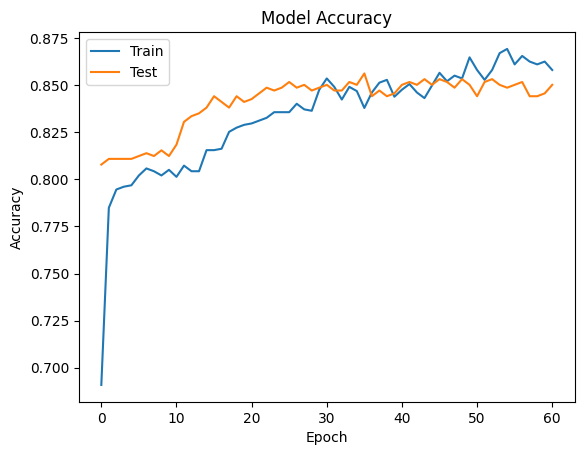

In [78]:
#plot model training history, for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

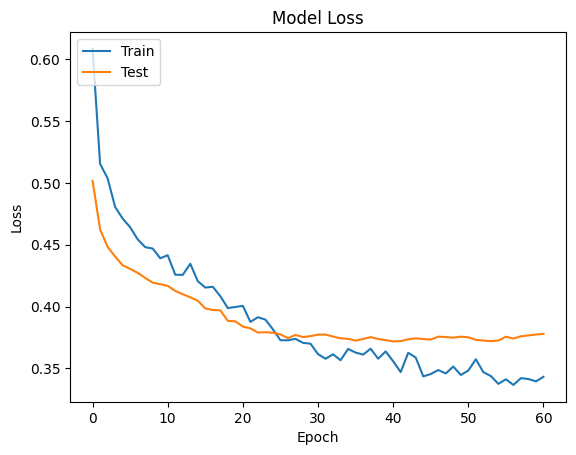

In [79]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [80]:
# Evaluate the model on the test data
#predict the test results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5856,  508],
       [ 793,  843]])

In [82]:
##calc the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.837375

In [83]:
#get the weights
classifier.get_weights()

[array([[ 3.4141520e-01, -3.7418851e-01, -9.5594250e-02, -9.2837684e-02,
         -1.3672087e-01,  3.9616594e-01, -4.5910805e-01, -2.4354145e-01,
          6.5734431e-02,  4.2572460e-01,  8.6796515e-02],
        [ 4.3894750e-01, -6.6659361e-01, -4.0535921e-01,  4.8035878e-04,
          3.9232972e-01,  7.4661411e-03, -3.6041683e-01, -1.2013838e-01,
         -5.6850541e-01,  1.1657788e-01, -5.6479567e-01],
        [ 3.1735593e-01, -2.2914352e-01, -1.1228565e-01,  2.3676144e-02,
          2.7928683e-01,  5.1334864e-01,  2.8906372e-01, -5.5150047e-02,
         -6.4562187e-02, -2.6549980e-01,  2.2816633e-01],
        [ 2.9695824e-01, -2.3509437e-01, -3.2996222e-02, -3.2858512e-01,
          5.4831201e-01,  3.2714888e-01, -8.7264740e-01,  6.3959295e-01,
          1.7557806e-01,  4.5628142e-02,  5.2174991e-01],
        [ 6.1155206e-01,  3.4988198e-01, -1.7135207e-01, -7.8662831e-01,
         -2.9011950e-01,  4.6987858e-01,  3.1365472e-01,  1.0973779e+00,
          1.9896144e-04,  8.5844748e-0